In [1]:
# load the autoreload extension
%reload_ext autoreload
# Set extension to reload modules every time before executing code
%autoreload 2

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os
%matplotlib inline

In [2]:
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow import keras


Using TensorFlow backend.
/home/ajana/.local/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/ajana/.local/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/ajana/.local/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/ajana/.local/lib/python3.7/site-packages/tensorflow/python/fra

In [37]:
path = '/mnt/data4/Abhishek/WP/'
path_vpf = '/mnt/data4/Abhishek/VPF/random/'
f = np.loadtxt('/home/ajana/github/HODProject/parameters.txt')

def extractIndex(filename):
    return int(filename.split('_')[-1][:4])

random_data = []

for filename in os.listdir(path):
    if filename.startswith('wp_galaxies'):
        pos = extractIndex(filename)
        wp,_ = np.load(os.path.join(path,filename))
        _,vpf = np.load(os.path.join(path_vpf,'vpf_'+filename[3:]))
        _temp = np.concatenate((vpf,wp,f[pos]))
        random_data.append(_temp)
        
full_data = np.vstack((random_data))
del random_data
np.random.shuffle(full_data)

In [38]:
X_data = full_data[:,:-5]
y_data = full_data[:,-5:]
from sklearn.preprocessing import  MinMaxScaler
sc= MinMaxScaler()
X_data= sc.fit_transform(X_data)
y_data= y_data.reshape(-1,5)
y_data=sc.fit_transform(y_data)

In [39]:
def plot_corr(pred,test):
    sns.jointplot(pred.iloc[:,0],test.iloc[:,0],kind = "kde")
    sns.jointplot(pred.iloc[:,1],test.iloc[:,1],kind = 'kde',color='purple')
    sns.jointplot(pred.iloc[:,2],test.iloc[:,2],kind = 'kde',color='blue')
    sns.jointplot(pred.iloc[:,3],test.iloc[:,3],kind = 'kde',color='green')
    sns.jointplot(pred.iloc[:,4],test.iloc[:,4],kind = 'kde',color='red')
    plt.tight_layout
    
def plot_error(pred,test,dims=(12,8)):
    fig,ax = plt.subplots(figsize=dims)
    sns.distplot(pred.iloc[:,0]-test.iloc[:,0],color='blue',ax=ax,kde_kws={"label": "M_cut"})
    sns.distplot(pred.iloc[:,1]-test.iloc[:,1],color='cyan',ax=ax,kde_kws={"label": "M_1"})
    sns.distplot(pred.iloc[:,2]-test.iloc[:,2],color='purple',ax=ax,kde_kws={"label": "Sigma"})
    sns.distplot(pred.iloc[:,3]-test.iloc[:,3],color='yellow',ax=ax,kde_kws={"label": "Kappa"})
    sns.distplot(pred.iloc[:,4]-test.iloc[:,4],color='red',ax=ax,kde_kws={"label": "Alpha"})

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.1,random_state=42)

In [41]:
in_dim = X_train.shape[1]
out_dim = y_train.shape[1]

In [42]:
model = Sequential()
model.add(Dense(128, input_dim=in_dim, activation="relu"))
model.add(Dense(64, activation="relu"))
model.add(Dense(32, activation="relu"))
model.add(Dense(out_dim))
model.compile(loss="mse", optimizer="adam")

In [43]:
def build_model(in_dim,out_dim):
    model = keras.Sequential([
        layers.Dense(128, activation='relu', input_dim=in_dim),
        layers.Dense(128, activation='relu'),
        layers.Dense(64, activation='relu'),
        layers.Dense(out_dim)
      ])

    optimizer = tf.keras.optimizers.RMSprop(0.0001)

    model.compile(loss='mse',
                    optimizer=optimizer,
                    metrics=['mae', 'mse'])
    return model

In [44]:
mod = build_model(in_dim,out_dim)
mod.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 128)               7680      
_________________________________________________________________
dense_9 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_10 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_11 (Dense)             (None, 5)                 325       
Total params: 32,773
Trainable params: 32,773
Non-trainable params: 0
_________________________________________________________________


In [45]:
#y_rf = pd.DataFrame(y_rf)

#y_test.reset_index(drop=True, inplace=True)
#y_rf.reset_index(drop=True, inplace=True)


In [55]:
history = mod.fit(X_train, y_train, epochs=600,validation_split=0.2, verbose=1)

Train on 3600 samples, validate on 900 samples
Epoch 1/600
3600/3600 [==============================] - 0s 68us/sample - loss: 0.0206 - mean_absolute_error: 0.0935 - mean_squared_error: 0.0206 - val_loss: 0.0293 - val_mean_absolute_error: 0.1279 - val_mean_squared_error: 0.0293
Epoch 2/600
3600/3600 [==============================] - 0s 70us/sample - loss: 0.0205 - mean_absolute_error: 0.0935 - mean_squared_error: 0.0205 - val_loss: 0.0193 - val_mean_absolute_error: 0.0861 - val_mean_squared_error: 0.0193
Epoch 3/600
3600/3600 [==============================] - 0s 52us/sample - loss: 0.0207 - mean_absolute_error: 0.0943 - mean_squared_error: 0.0207 - val_loss: 0.0196 - val_mean_absolute_error: 0.0881 - val_mean_squared_error: 0.0196
Epoch 4/600
3600/3600 [==============================] - 0s 51us/sample - loss: 0.0203 - mean_absolute_error: 0.0930 - mean_squared_error: 0.0203 - val_loss: 0.0204 - val_mean_absolute_error: 0.0930 - val_mean_squared_error: 0.0204
Epoch 5/600
3600/3600 [==

Epoch 36/600
3600/3600 [==============================] - 0s 50us/sample - loss: 0.0197 - mean_absolute_error: 0.0893 - mean_squared_error: 0.0197 - val_loss: 0.0191 - val_mean_absolute_error: 0.0829 - val_mean_squared_error: 0.0191
Epoch 37/600
3600/3600 [==============================] - 0s 49us/sample - loss: 0.0196 - mean_absolute_error: 0.0893 - mean_squared_error: 0.0196 - val_loss: 0.0212 - val_mean_absolute_error: 0.0965 - val_mean_squared_error: 0.0212
Epoch 38/600
3600/3600 [==============================] - 0s 50us/sample - loss: 0.0195 - mean_absolute_error: 0.0889 - mean_squared_error: 0.0195 - val_loss: 0.0204 - val_mean_absolute_error: 0.0900 - val_mean_squared_error: 0.0204
Epoch 39/600
3600/3600 [==============================] - 0s 50us/sample - loss: 0.0196 - mean_absolute_error: 0.0894 - mean_squared_error: 0.0196 - val_loss: 0.0195 - val_mean_absolute_error: 0.0869 - val_mean_squared_error: 0.0195
Epoch 40/600
3600/3600 [==============================] - 0s 49us/sa

3600/3600 [==============================] - 0s 50us/sample - loss: 0.0186 - mean_absolute_error: 0.0845 - mean_squared_error: 0.0186 - val_loss: 0.0192 - val_mean_absolute_error: 0.0861 - val_mean_squared_error: 0.0192
Epoch 107/600
3600/3600 [==============================] - 0s 51us/sample - loss: 0.0186 - mean_absolute_error: 0.0849 - mean_squared_error: 0.0186 - val_loss: 0.0190 - val_mean_absolute_error: 0.0840 - val_mean_squared_error: 0.0190
Epoch 108/600
3600/3600 [==============================] - 0s 51us/sample - loss: 0.0186 - mean_absolute_error: 0.0847 - mean_squared_error: 0.0186 - val_loss: 0.0193 - val_mean_absolute_error: 0.0851 - val_mean_squared_error: 0.0193
Epoch 109/600
3600/3600 [==============================] - 0s 51us/sample - loss: 0.0186 - mean_absolute_error: 0.0849 - mean_squared_error: 0.0186 - val_loss: 0.0188 - val_mean_absolute_error: 0.0836 - val_mean_squared_error: 0.0188
Epoch 110/600
3600/3600 [==============================] - 0s 52us/sample - lo

3600/3600 [==============================] - 0s 52us/sample - loss: 0.0179 - mean_absolute_error: 0.0814 - mean_squared_error: 0.0179 - val_loss: 0.0208 - val_mean_absolute_error: 0.0951 - val_mean_squared_error: 0.0208
Epoch 177/600
3600/3600 [==============================] - 0s 73us/sample - loss: 0.0179 - mean_absolute_error: 0.0814 - mean_squared_error: 0.0179 - val_loss: 0.0211 - val_mean_absolute_error: 0.0944 - val_mean_squared_error: 0.0211
Epoch 178/600
3600/3600 [==============================] - 0s 78us/sample - loss: 0.0178 - mean_absolute_error: 0.0813 - mean_squared_error: 0.0178 - val_loss: 0.0182 - val_mean_absolute_error: 0.0782 - val_mean_squared_error: 0.0182
Epoch 179/600
3600/3600 [==============================] - 0s 84us/sample - loss: 0.0179 - mean_absolute_error: 0.0820 - mean_squared_error: 0.0179 - val_loss: 0.0193 - val_mean_absolute_error: 0.0840 - val_mean_squared_error: 0.0193
Epoch 180/600
3600/3600 [==============================] - 0s 80us/sample - lo

3600/3600 [==============================] - 0s 54us/sample - loss: 0.0174 - mean_absolute_error: 0.0798 - mean_squared_error: 0.0174 - val_loss: 0.0212 - val_mean_absolute_error: 0.0964 - val_mean_squared_error: 0.0212
Epoch 247/600
3600/3600 [==============================] - 0s 51us/sample - loss: 0.0173 - mean_absolute_error: 0.0791 - mean_squared_error: 0.0173 - val_loss: 0.0188 - val_mean_absolute_error: 0.0814 - val_mean_squared_error: 0.0188
Epoch 248/600
3600/3600 [==============================] - 0s 50us/sample - loss: 0.0172 - mean_absolute_error: 0.0788 - mean_squared_error: 0.0172 - val_loss: 0.0182 - val_mean_absolute_error: 0.0772 - val_mean_squared_error: 0.0182
Epoch 249/600
3600/3600 [==============================] - 0s 49us/sample - loss: 0.0172 - mean_absolute_error: 0.0793 - mean_squared_error: 0.0172 - val_loss: 0.0186 - val_mean_absolute_error: 0.0811 - val_mean_squared_error: 0.0186
Epoch 250/600
3600/3600 [==============================] - 0s 49us/sample - lo

3600/3600 [==============================] - 0s 75us/sample - loss: 0.0166 - mean_absolute_error: 0.0769 - mean_squared_error: 0.0166 - val_loss: 0.0185 - val_mean_absolute_error: 0.0777 - val_mean_squared_error: 0.0185
Epoch 317/600
3600/3600 [==============================] - 0s 73us/sample - loss: 0.0166 - mean_absolute_error: 0.0768 - mean_squared_error: 0.0166 - val_loss: 0.0185 - val_mean_absolute_error: 0.0773 - val_mean_squared_error: 0.0185
Epoch 318/600
3600/3600 [==============================] - 0s 89us/sample - loss: 0.0167 - mean_absolute_error: 0.0774 - mean_squared_error: 0.0167 - val_loss: 0.0209 - val_mean_absolute_error: 0.0902 - val_mean_squared_error: 0.0209
Epoch 319/600
3600/3600 [==============================] - 0s 69us/sample - loss: 0.0167 - mean_absolute_error: 0.0773 - mean_squared_error: 0.0167 - val_loss: 0.0188 - val_mean_absolute_error: 0.0797 - val_mean_squared_error: 0.0188
Epoch 320/600
3600/3600 [==============================] - 0s 46us/sample - lo

3600/3600 [==============================] - 0s 54us/sample - loss: 0.0160 - mean_absolute_error: 0.0749 - mean_squared_error: 0.0160 - val_loss: 0.0198 - val_mean_absolute_error: 0.0847 - val_mean_squared_error: 0.0198
Epoch 387/600
3600/3600 [==============================] - 0s 59us/sample - loss: 0.0162 - mean_absolute_error: 0.0757 - mean_squared_error: 0.0162 - val_loss: 0.0212 - val_mean_absolute_error: 0.0896 - val_mean_squared_error: 0.0212
Epoch 388/600
3600/3600 [==============================] - 0s 55us/sample - loss: 0.0160 - mean_absolute_error: 0.0748 - mean_squared_error: 0.0160 - val_loss: 0.0208 - val_mean_absolute_error: 0.0893 - val_mean_squared_error: 0.0208
Epoch 389/600
3600/3600 [==============================] - 0s 55us/sample - loss: 0.0161 - mean_absolute_error: 0.0753 - mean_squared_error: 0.0161 - val_loss: 0.0186 - val_mean_absolute_error: 0.0766 - val_mean_squared_error: 0.0186
Epoch 390/600
3600/3600 [==============================] - 0s 54us/sample - lo

3600/3600 [==============================] - 0s 87us/sample - loss: 0.0155 - mean_absolute_error: 0.0732 - mean_squared_error: 0.0155 - val_loss: 0.0190 - val_mean_absolute_error: 0.0771 - val_mean_squared_error: 0.0190
Epoch 457/600
3600/3600 [==============================] - 0s 84us/sample - loss: 0.0157 - mean_absolute_error: 0.0740 - mean_squared_error: 0.0157 - val_loss: 0.0215 - val_mean_absolute_error: 0.0914 - val_mean_squared_error: 0.0215
Epoch 458/600
3600/3600 [==============================] - 0s 48us/sample - loss: 0.0155 - mean_absolute_error: 0.0733 - mean_squared_error: 0.0155 - val_loss: 0.0205 - val_mean_absolute_error: 0.0829 - val_mean_squared_error: 0.0205
Epoch 459/600
3600/3600 [==============================] - 0s 45us/sample - loss: 0.0154 - mean_absolute_error: 0.0731 - mean_squared_error: 0.0154 - val_loss: 0.0193 - val_mean_absolute_error: 0.0770 - val_mean_squared_error: 0.0193
Epoch 460/600
3600/3600 [==============================] - 0s 46us/sample - lo

3600/3600 [==============================] - 0s 49us/sample - loss: 0.0150 - mean_absolute_error: 0.0725 - mean_squared_error: 0.0150 - val_loss: 0.0199 - val_mean_absolute_error: 0.0789 - val_mean_squared_error: 0.0199
Epoch 527/600
3600/3600 [==============================] - 0s 49us/sample - loss: 0.0150 - mean_absolute_error: 0.0721 - mean_squared_error: 0.0150 - val_loss: 0.0199 - val_mean_absolute_error: 0.0826 - val_mean_squared_error: 0.0199
Epoch 528/600
3600/3600 [==============================] - 0s 49us/sample - loss: 0.0150 - mean_absolute_error: 0.0724 - mean_squared_error: 0.0150 - val_loss: 0.0208 - val_mean_absolute_error: 0.0818 - val_mean_squared_error: 0.0208
Epoch 529/600
3600/3600 [==============================] - 0s 48us/sample - loss: 0.0150 - mean_absolute_error: 0.0718 - mean_squared_error: 0.0150 - val_loss: 0.0233 - val_mean_absolute_error: 0.1010 - val_mean_squared_error: 0.0233
Epoch 530/600
3600/3600 [==============================] - 0s 48us/sample - lo

3600/3600 [==============================] - 0s 45us/sample - loss: 0.0145 - mean_absolute_error: 0.0709 - mean_squared_error: 0.0145 - val_loss: 0.0201 - val_mean_absolute_error: 0.0779 - val_mean_squared_error: 0.0201
Epoch 597/600
3600/3600 [==============================] - 0s 45us/sample - loss: 0.0144 - mean_absolute_error: 0.0701 - mean_squared_error: 0.0144 - val_loss: 0.0203 - val_mean_absolute_error: 0.0790 - val_mean_squared_error: 0.0203
Epoch 598/600
3600/3600 [==============================] - 0s 45us/sample - loss: 0.0144 - mean_absolute_error: 0.0706 - mean_squared_error: 0.0144 - val_loss: 0.0202 - val_mean_absolute_error: 0.0799 - val_mean_squared_error: 0.0202
Epoch 599/600
3600/3600 [==============================] - 0s 46us/sample - loss: 0.0144 - mean_absolute_error: 0.0699 - mean_squared_error: 0.0144 - val_loss: 0.0202 - val_mean_absolute_error: 0.0790 - val_mean_squared_error: 0.0202
Epoch 600/600
3600/3600 [==============================] - 0s 47us/sample - lo

In [56]:
#pd.concat([y_test,y_rf] ,axis = 1)

In [57]:
y_pred = mod.predict(X_test)


In [58]:
ypred = pd.DataFrame(y_pred)
ytest = pd.DataFrame(y_test)

In [59]:
print("y1 MSE:%.4f" % mean_squared_error(ytest.iloc[:,0], y_pred[:,0])) 
print("y2 MSE:%.4f" % mean_squared_error(ytest.iloc[:,1], y_pred[:,1]))
print("y3 MSE:%.4f" % mean_squared_error(ytest.iloc[:,2], y_pred[:,2])) 
print("y4 MSE:%.4f" % mean_squared_error(ytest.iloc[:,3], y_pred[:,3]))
print("y5 MSE:%.4f" % mean_squared_error(ytest.iloc[:,4], y_pred[:,4])) 

y1 MSE:0.0018
y2 MSE:0.0041
y3 MSE:0.0003
y4 MSE:0.0870
y5 MSE:0.0037


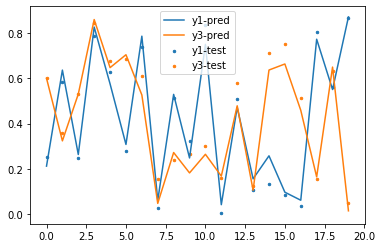

In [60]:
x_ax = range(len(X_test))
plt.scatter(x_ax[:20], ytest.iloc[:20,0],  s=6, label="y1-test")
plt.plot(x_ax[:20], ypred.iloc[:20,0], label="y1-pred")
plt.scatter(x_ax[:20], ytest.iloc[:20,1],  s=6, label="y3-test")
plt.plot(x_ax[:20], ypred.iloc[:20,1], label="y3-pred")
plt.legend()
plt.show()

dict_keys(['loss', 'mean_absolute_error', 'mean_squared_error', 'val_loss', 'val_mean_absolute_error', 'val_mean_squared_error'])


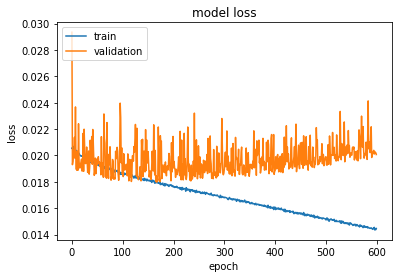

In [61]:
print(history.history.keys())
# "Loss"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

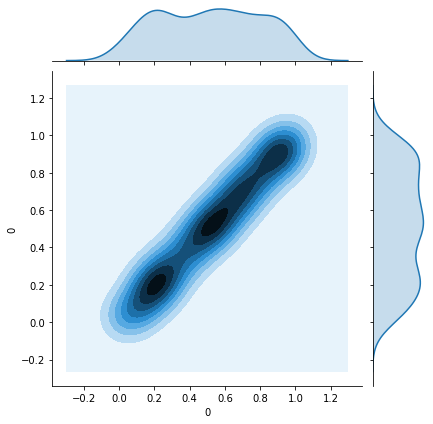

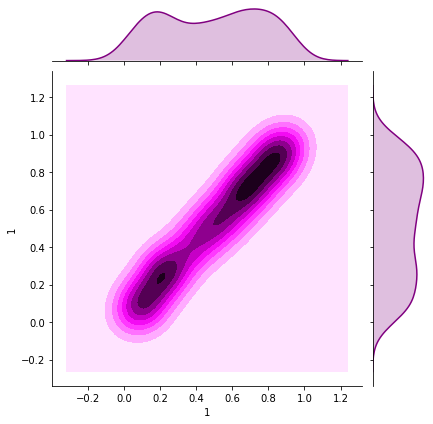

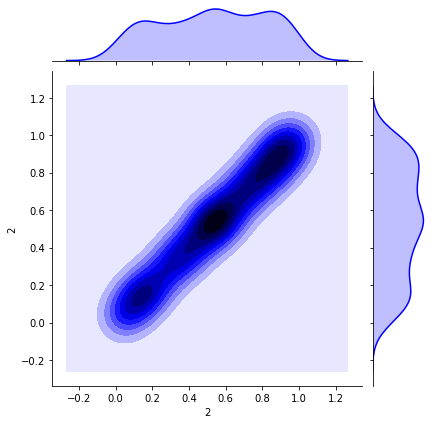

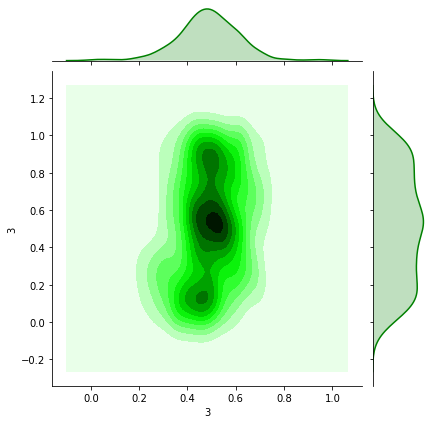

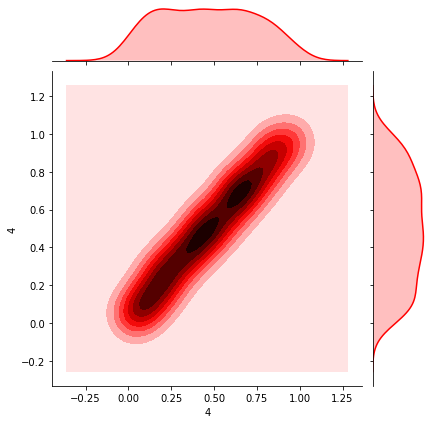

In [62]:
plot_corr(ypred,ytest)

In [53]:
ytest.reset_index(drop=True, inplace=True)
ypred.reset_index(drop=True, inplace=True)
pd.concat([ytest,ypred] ,axis = 1)

,0,1,2,3,4,0,1,2,3,4
0,0.252721,0.599728,0.512525,0.981790,0.657591,0.231055,0.576148,0.487459,0.518398,0.572734
1,0.584286,0.358530,0.932715,0.567207,0.325643,0.601309,0.409537,0.925475,0.435044,0.311838
2,0.248941,0.529385,0.143769,0.492893,0.188981,0.189050,0.555611,0.135954,0.490172,0.159177
3,0.785817,0.841516,0.847347,0.866447,0.471485,0.857280,0.836506,0.868012,0.548071,0.342384
4,0.627867,0.674821,0.528824,0.535871,0.752388,0.573493,0.613921,0.489683,0.488304,0.640762
...,...,...,...,...,...,...,...,...,...,...
495,0.527802,0.397016,0.204618,0.512096,0.753966,0.514856,0.374162,0.164782,0.498816,0.688411
496,0.055696,0.581310,0.477440,0.098886,0.553291,0.052919,0.495894,0.478110,0.508168,0.426957
497,0.217943,0.324533,0.455735,0.183283,0.974808,0.208432,0.250947,0.460487,0.556596,0.874762
498,0.279715,0.812766,0.733105,0.355676,0.268785,0.233802,0.742213,0.722258,0.505625,0.164122


In [54]:
sns.jointplot(y_rf.iloc[:,0],y_rf.iloc[:,0]-y_test.iloc[:,0],kind = 'kde',color='green')

NameError: name 'y_rf' is not defined

In [ ]:
sns.jointplot(y_rf.iloc[:,1],y_rf.iloc[:,1]-y_test.iloc[:,1],kind = 'kde',color='green')

In [ ]:
sns.jointplot(y_rf.iloc[:,2],y_rf.iloc[:,2]-y_test.iloc[:,2],kind = 'kde',color='green')

In [ ]:
sns.jointplot(y_rf.iloc[:,3],y_rf.iloc[:,3]-y_test.iloc[:,3],kind = 'kde',color='green')

In [ ]:
sns.jointplot(y_rf.iloc[:,4],y_rf.iloc[:,4]-y_test.iloc[:,4],kind = 'kde',color='green')